In [3]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Improve chart aesthetics
sns.set(style="whitegrid")


# Load the dataset

In [6]:
# This reads in the CSV file you provided and displays the first few rows to explore the structure
df = pd.read_csv("/cleaned_IT_Career_Outcomes_USA_Combined_By_EducationType_Demographics.csv")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

# Data Cleaning

In [8]:
# Some salary columns may contain strings, so we fix that here
cols_to_convert = ['Salary_Before', 'Salary_After', 'Salary_Lift(%)', 'Employment_Rate']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [10]:
# This shows min, max, mean, etc. to understand the distributions
df.describe()


,Salary_Before,Salary_After,Employment_Rate,Salary_Lift(%),Sample_Size
count,51.000000,57.000000,58.000000,54.000000,0.0
mean,44763.019608,66016.070175,86.031034,51.870370,NaN
std,9980.874931,12288.259372,9.296277,30.119289,NaN
min,20551.000000,35884.000000,50.000000,-4.000000,NaN
25%,39692.500000,59752.000000,82.250000,37.250000,NaN
50%,44712.000000,65828.000000,88.000000,51.000000,NaN
75%,47023.500000,71263.000000,92.000000,65.750000,NaN
max,86829.000000,97666.000000,100.000000,200.000000,NaN


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Program_Type           63 non-null     object 
 1   Platform               63 non-null     object 
 2   Segment                63 non-null     object 
 3   Group                  63 non-null     object 
 4   Salary_Before          51 non-null     float64
 5   Salary_After           57 non-null     float64
 6   Employment_Rate        58 non-null     float64
 7   Salary_Lift(%)         54 non-null     float64
 8   Employment_Lag_Months  5 non-null      object 
 9   Sample_Size            0 non-null      float64
 10  Notes                  9 non-null      object 
dtypes: float64(5), object(6)
memory usage: 5.5+ KB


# Data visualization

/tmp/ipython-input-12-2563880594.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_df, x="Salary_Lift(%)", y="Group", palette="Blues_r")
/tmp/ipython-input-12-2563880594.py:11: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


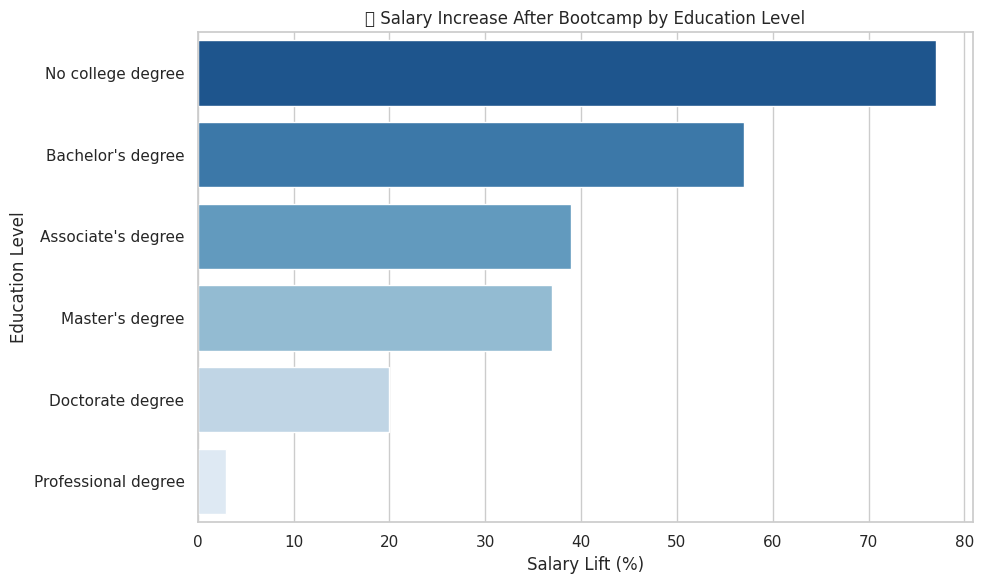

In [12]:
# Analyze education-related outcomes
edu_df = df[df["Segment"] == "Education"].sort_values(
    by="Salary_Lift(%)", ascending=False
)

plt.figure(figsize=(10, 6))
sns.barplot(data=edu_df, x="Salary_Lift(%)", y="Group", palette="Blues_r")
plt.title("💼 Salary Increase After Bootcamp by Education Level")
plt.xlabel("Salary Lift (%)")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-412550090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_df, x="Group", y="Salary_After", palette="Set2")


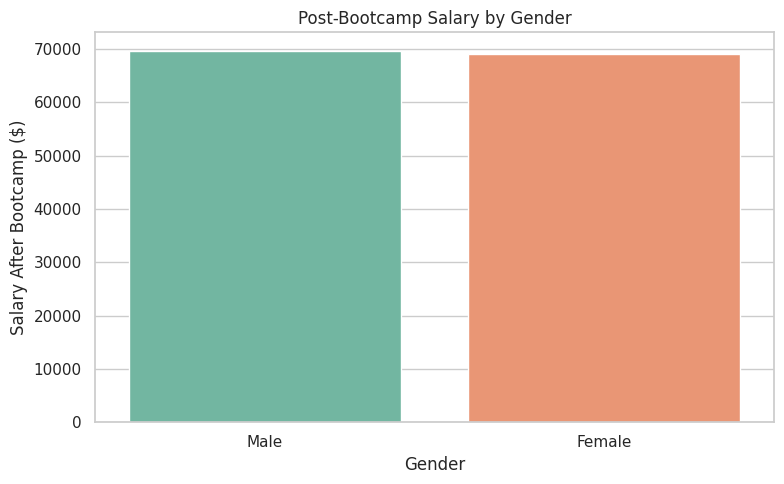

In [13]:
#  Compare average post-bootcamp salary between genders
gender_df = df[df["Segment"] == "Gender"]

plt.figure(figsize=(8, 5))
sns.barplot(data=gender_df, x="Group", y="Salary_After", palette="Set2")
plt.title("Post-Bootcamp Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Salary After Bootcamp ($)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-3997382771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_df, x='Salary_Lift(%)', y='Group', palette='viridis')


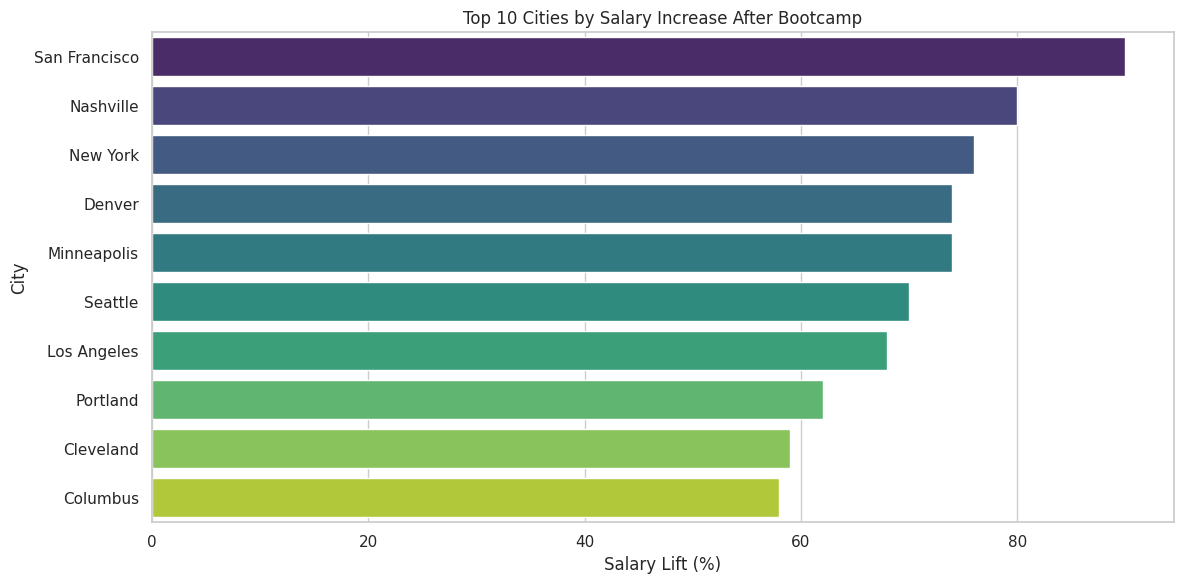

In [15]:
# Find cities with highest salary improvements
city_df = df[df['Segment'] == 'Location'].sort_values(by='Salary_Lift(%)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=city_df, x='Salary_Lift(%)', y='Group', palette='viridis')
plt.title('Top 10 Cities by Salary Increase After Bootcamp')
plt.xlabel('Salary Lift (%)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

/tmp/ipython-input-16-3037564329.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lang_df, x="Salary_Lift(%)", y="Group", palette="rocket")


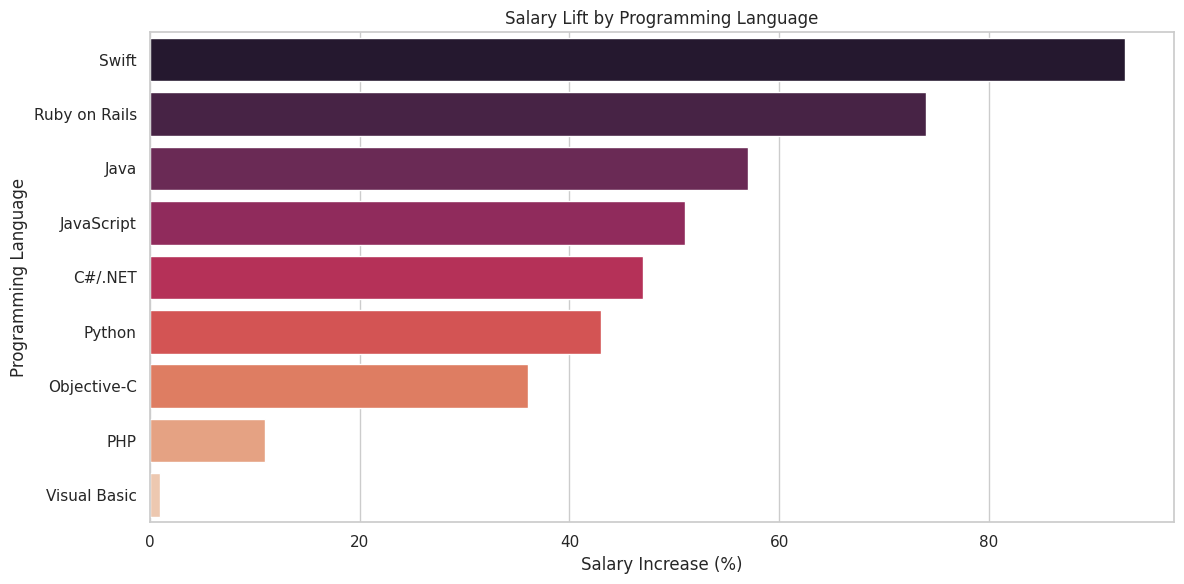

In [16]:
# Salary growth by programming language studied
lang_df = df[df["Segment"] == "Language"].sort_values(
    by="Salary_Lift(%)", ascending=False
)

plt.figure(figsize=(12, 6))
sns.barplot(data=lang_df, x="Salary_Lift(%)", y="Group", palette="rocket")
plt.title("Salary Lift by Programming Language")
plt.xlabel("Salary Increase (%)")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

In [18]:
# Save the cleaned and enhanced dataset for later use
df.to_csv(
    "cleaned_IT_Career_Outcomes_USA_Combined_By_EducationType_Demographics.csv",
    index=False,
)
print(
    "✅ Clean dataset saved as 'cleaned_IT_Career_Outcomes_USA_Combined_By_EducationType_Demographics.csv'"
)


✅ Clean dataset saved as 'cleaned_IT_Career_Outcomes_USA_Combined_By_EducationType_Demographics.csv'
